In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipt
import mxnet as mx
from intonet import *
import matplotlib.pyplot as plt
import numpy as np

done!


In [11]:
load = ('./<12-17:07:09>TEST[E10]/[ACC-0.86107 E9]', 9)
from Evol.e_net import e_net
import my_utils as mu
from Evol.load_e import get
iters = get(4,small=True, aug=True)
net = e_net()

Data Shape, Train (504, 1, 256, 256), Val (9, 1, 256, 256)


In [9]:
train = iters['train']
img, ll = train.data[0][1], train.label[0][1]

train = mx.io.NDArrayIter(img[:100], ll[:100], batch_size=1)

In [12]:
out, img, ll, arg, aux = fetch_internal(net, train, *load)


['data', 'c1_1_weight', 'c1_1_bias', 'c1_1_output', 'r1_1_output', 'c1_2_weight', 'c1_2_bias', 'c1_2_output', 'r1_2_output', 'c1_3_weight', 'c1_3_bias', 'c1_3_output', 'b1_3_gamma', 'b1_3_beta', 'b1_3_output', 'r1_3_output', 'pooling0_output', 'c2_1_weight', 'c2_1_bias', 'c2_1_output', 'r2_1_output', 'c2_2_weight', 'c2_2_bias', 'c2_2_output', 'r2_2_output', 'c2_3_weight', 'c2_3_bias', 'c2_3_output', 'b2_3_gamma', 'b2_3_beta', 'b2_3_output', 'r2_3_output', 'pooling1_output', 'pooling2_output', '_plus0_output', 'c3_1_weight', 'c3_1_bias', 'c3_1_output', 'r3_1_output', 'c3_2_weight', 'c3_2_bias', 'c3_2_output', 'b3_2_gamma', 'b3_2_beta', 'b3_2_output', 'r3_2_output', 'c3_3_weight', 'c3_3_bias', 'c3_3_output', 'softmax_label', 'softmax_output'] 

Abandoned: data
Abandoned: c1_1_weight
Abandoned: c1_1_bias
Abandoned: c1_2_weight
Abandoned: c1_2_bias
Abandoned: c1_3_weight
Abandoned: c1_3_bias
Abandoned: b1_3_gamma
Abandoned: b1_3_beta
Abandoned: c2_1_weight
Abandoned: c2_1_bias
Abandoned: 

# In and Out

(64, 130, 130) (32, 260, 260)
0


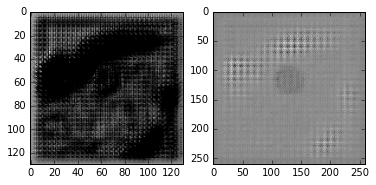

1


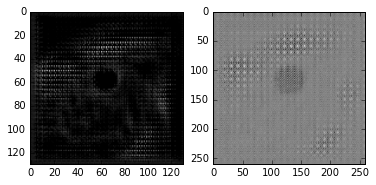

2


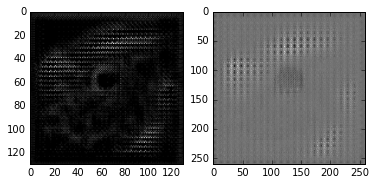

3


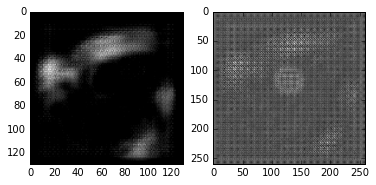

4


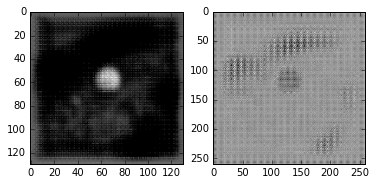

5


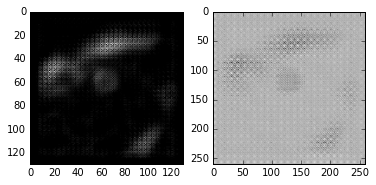

6


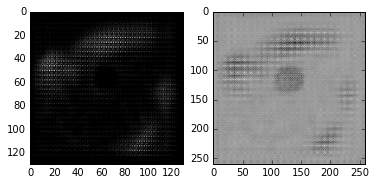

7


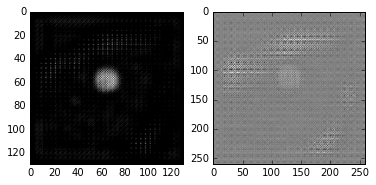

8


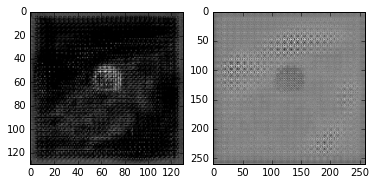

9


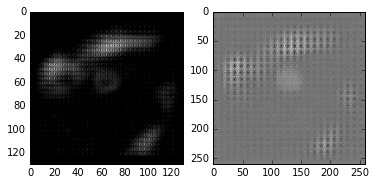

10


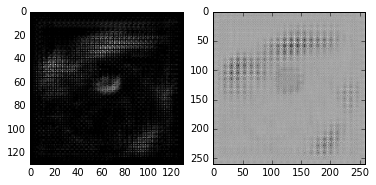

11


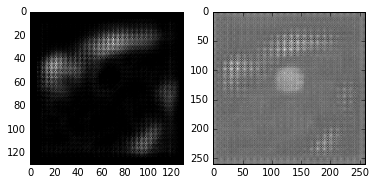

12


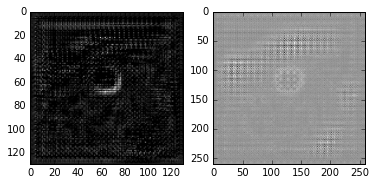

13


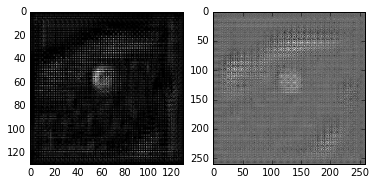

14


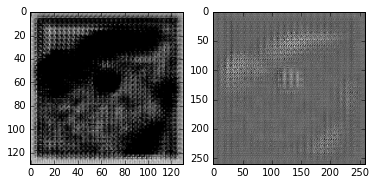

15


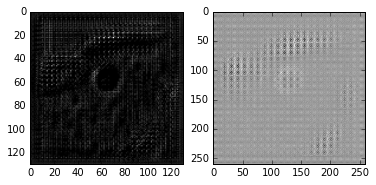

16


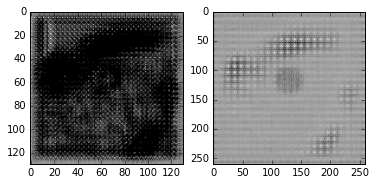

17


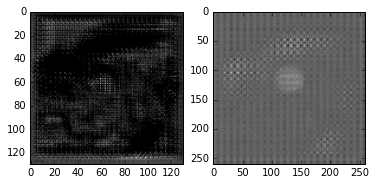

18


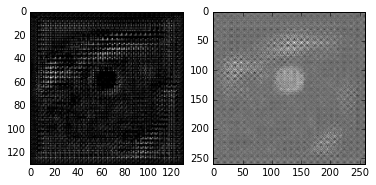

19


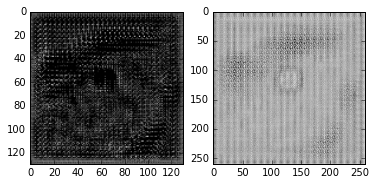

20


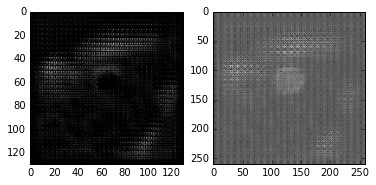

21


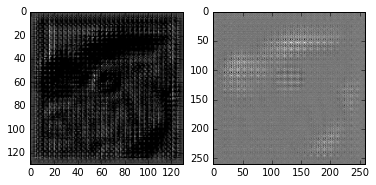

22


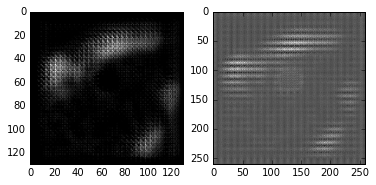

23


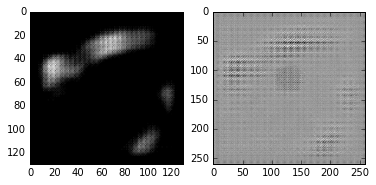

24


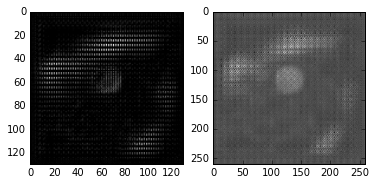

25


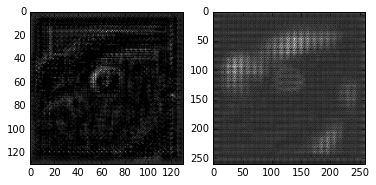

26


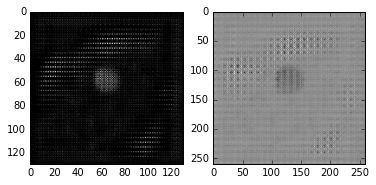

27


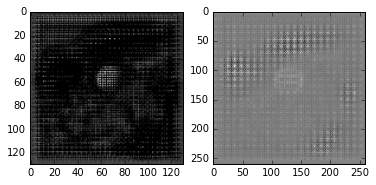

28


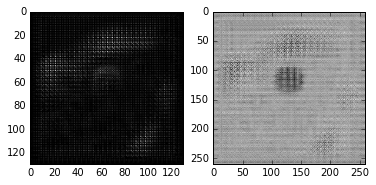

29


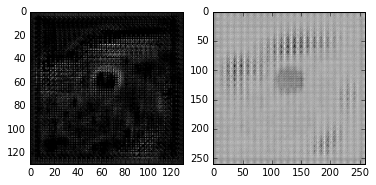

30


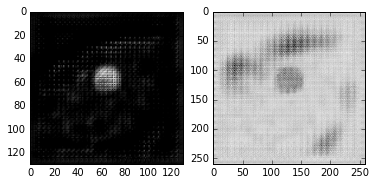

31


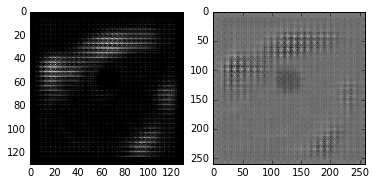

32


IndexError: index 32 is out of bounds for axis 0 with size 32

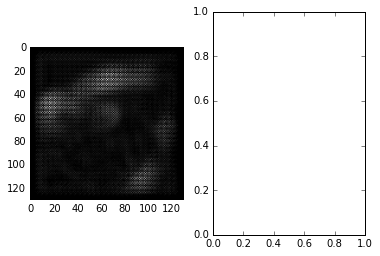

In [46]:
iii = out['deconvolution0'][0]
ooo =out['conv7'][0]
print ins.shape, outs.shape
F = ins.shape[0]
for i in range(F):
    print i
    fig, subs = plt.subplots(1,2)
    subs[0].imshow(ins[i], cmap='gray')
    subs[1].imshow(outs[i], cmap='gray')
    plt.show()
    fig.clear()

# Deconv

(64, 130, 130) (32, 260, 260)
0


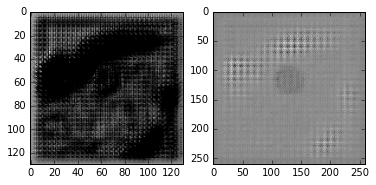

1


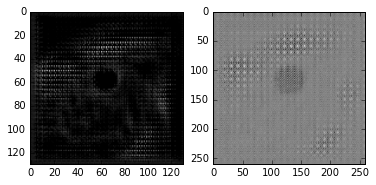

2


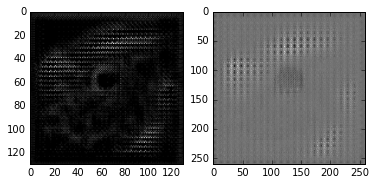

3


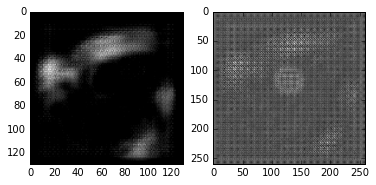

4


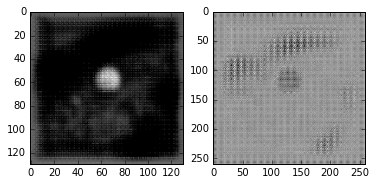

5


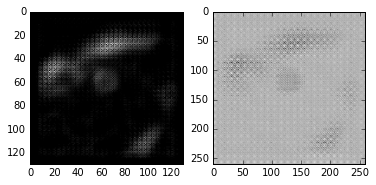

6


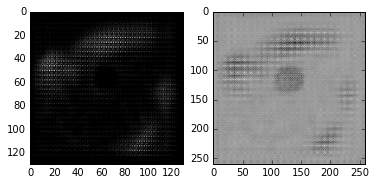

7


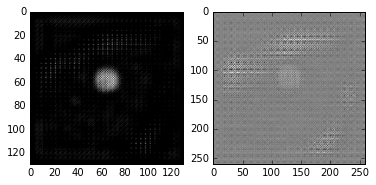

8


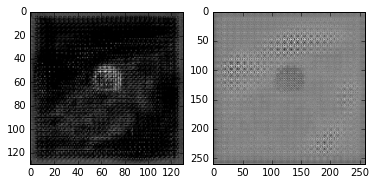

9


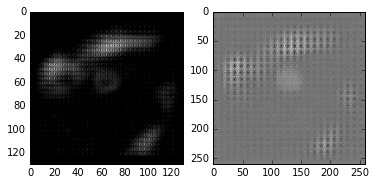

10


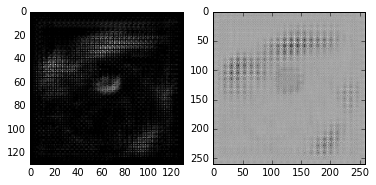

11


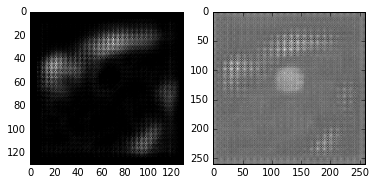

12


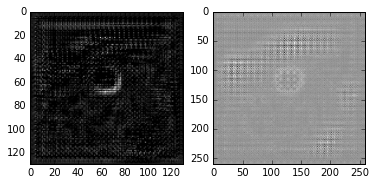

13


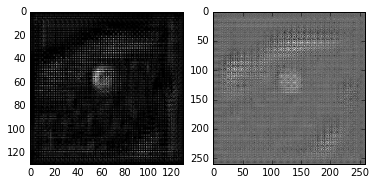

14


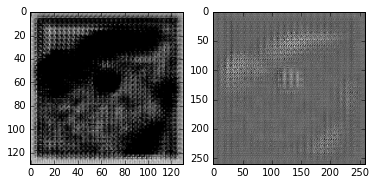

15


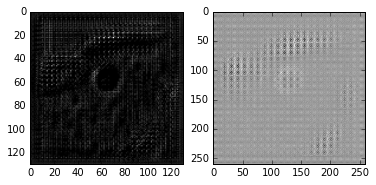

16


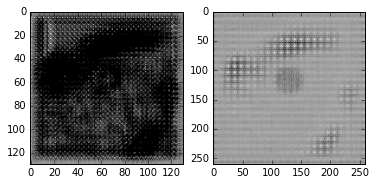

17


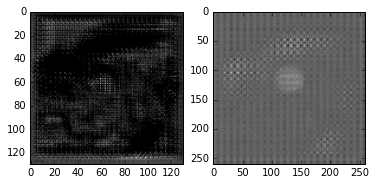

18


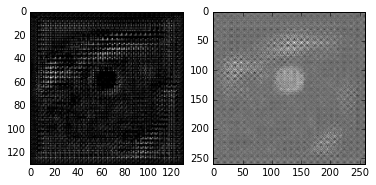

19


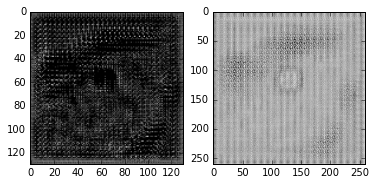

20


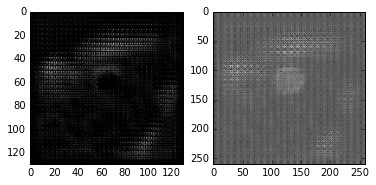

21


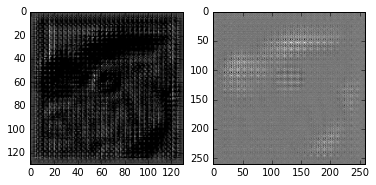

22


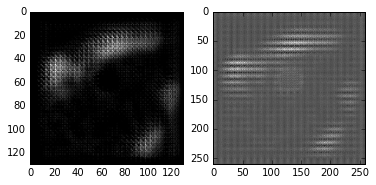

23


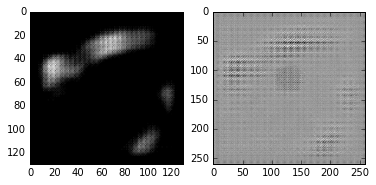

24


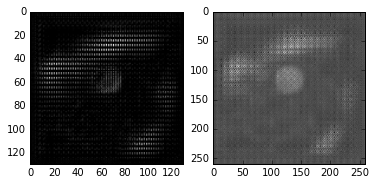

25


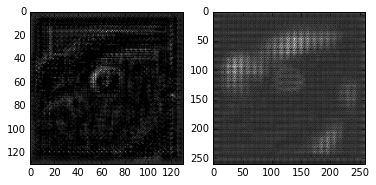

26


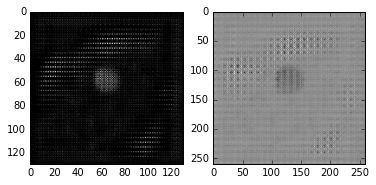

27


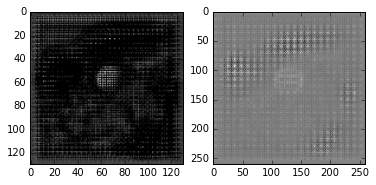

28


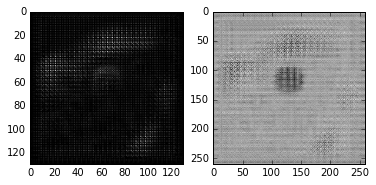

29


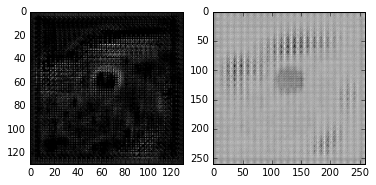

30


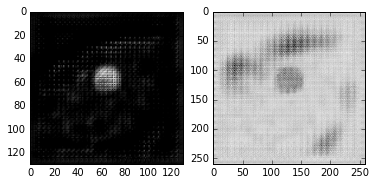

31


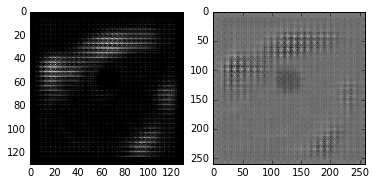

32


IndexError: index 32 is out of bounds for axis 0 with size 32

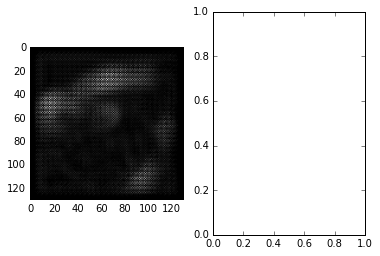

In [45]:
ins=out['activation7'][0]
outs=out['deconvolution2'][0]
print ins.shape, outs.shape
F = ins.shape[0]
for i in range(F):
    print i
    fig, subs = plt.subplots(1,2)
    subs[0].imshow(ins[i], cmap='gray')
    subs[1].imshow(outs[i], cmap='gray')
    plt.show()
    fig.clear()

# Filter

conv1_weight


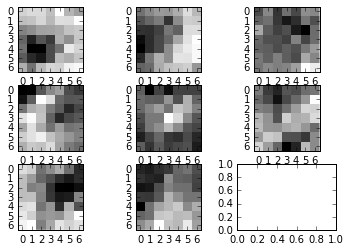

conv2_weight


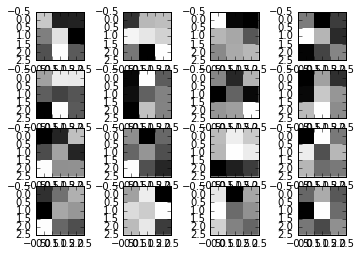

conv3_weight


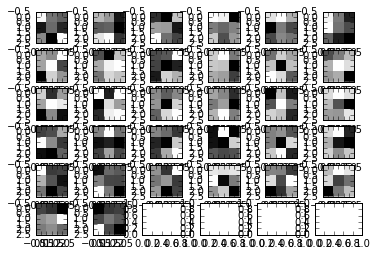

conv4_weight


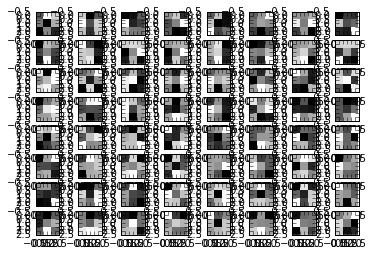

conv5_weight


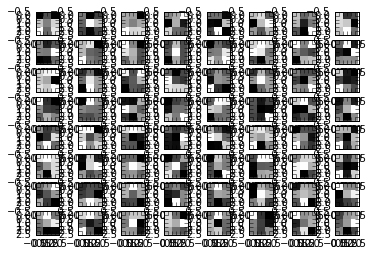

conv6_weight


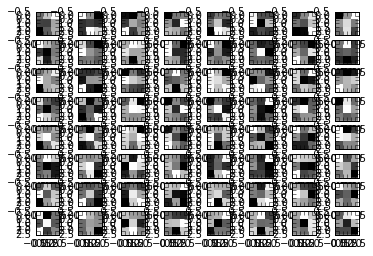

conv7_weight


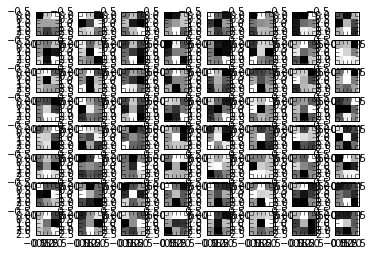

conv8_weight


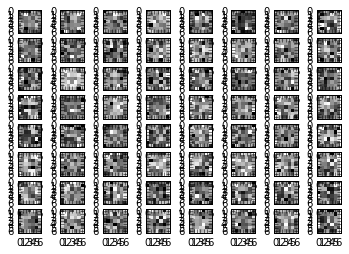

conv9_weight


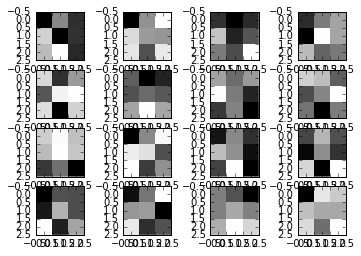

conv10_weight


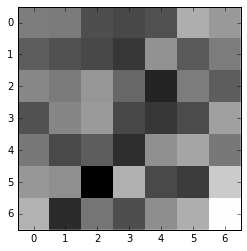

conv11_weight


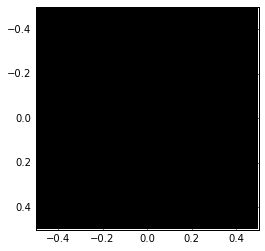

In [35]:
for i in range(1,12):
    weight = 'conv%d_weight'%i
    print weight
    filters = arg[weight]
    F = filters.shape[0]
    side = int(np.ceil(np.sqrt(F)))
    fig, subs = plt.subplots(side,side)
    subs = np.array([subs]) if not isinstance(subs, np.ndarray) else subs
    subs = subs.ravel()
    for i in range(F):
        subs[i].imshow(filters[i,0], cmap='gray', interpolation='none')
    plt.show()
    fig.clear()

# Activitation

r1_1


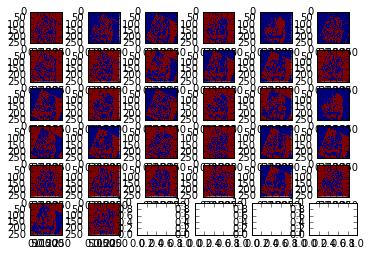

r1_2


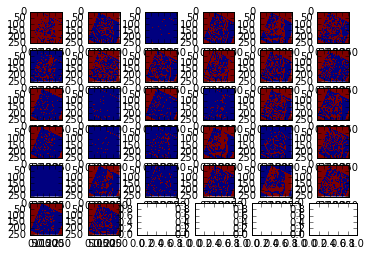

r1_3


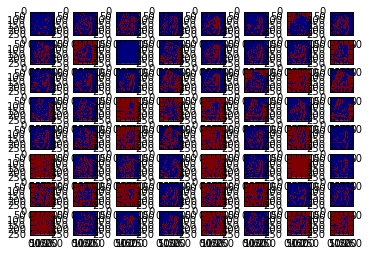

r2_1


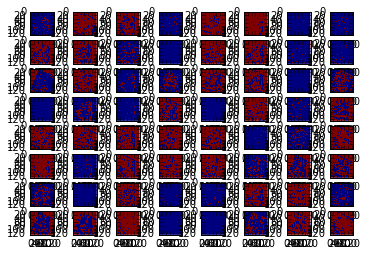

r2_2


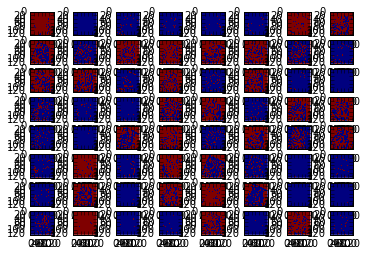

r2_3


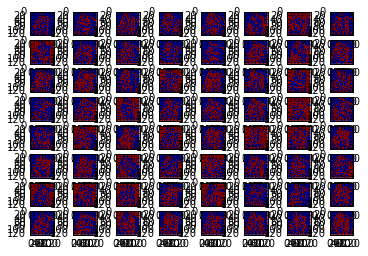

r3_1


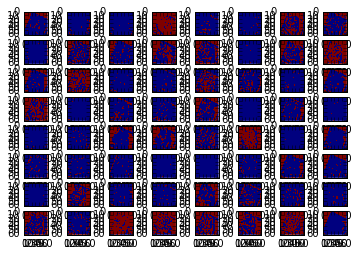

r3_2


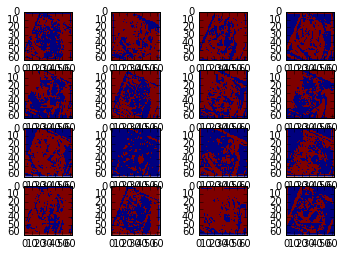

r3_3


KeyError: 'r3_3'

In [19]:
for i in range(1,4):
    for j in range(1,4):
        layer = 'r%d_%d'%(i,j)
        print layer
        outputs = out[layer][0]
        F = outputs.shape[0]
        side = int(np.ceil(np.sqrt(F)))
        fig, subs = plt.subplots(side,side)
        subs = subs.ravel()
        for t in range(F):
            active = outputs[t]>0
            subs[t].imshow(active, interpolation='none')
        plt.show()
        fig.clear()

c1_1
-0.0459302


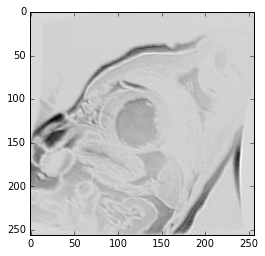

c1_2
-21.1714


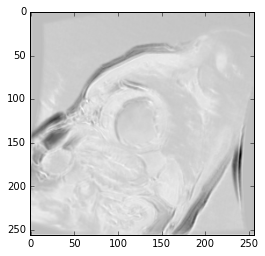

c1_3
10.4006


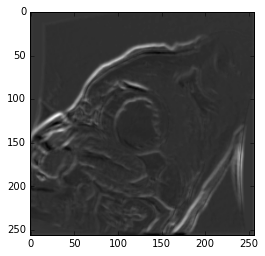

c2_1
-0.535366


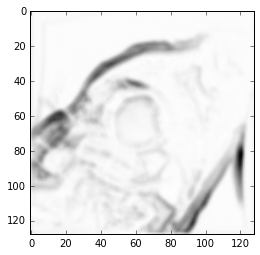

c2_2
-0.490258


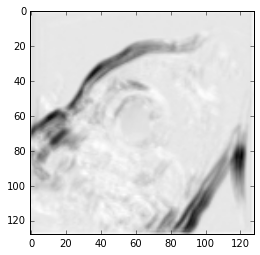

c2_3
-0.445219


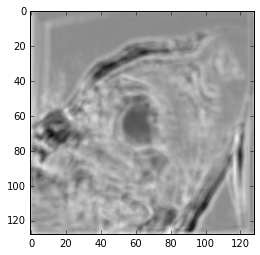

c3_1
-1.88189


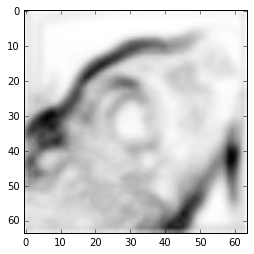

c3_2
-0.13737


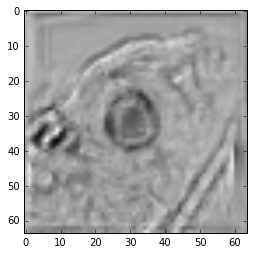

c3_3
-11.5789


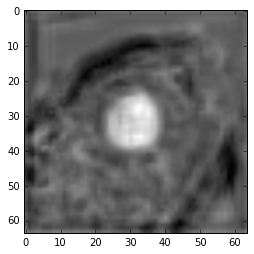

In [15]:
sample=2
for i in range(1,4):
    for j in range(1,4):
        name = 'c%d_%d'%(i,j)
        print name
        array = out[name][sample].mean(axis=0)
        print array.mean()
        plt.imshow(array, cmap='gray')
        plt.show()